# Vector Spaces 

### We will be making vectors from human language, and we'll need to know or review what a vector is. Most of us have probably studied math, physics or engineering and have seen this in school. Others might not have, perhaps being from a CS or other background.

### A vector is a special object and it only formally exists in a vector space. Since we are not in a physical space, we can relax the usual rules and not argue about math.

There are two parts to a vector:

* magnitude
* direction

The magnitude is the distance a vector describes. It could be in any direction. The distance from San Francisco to San Jose roughly 80 miles. Distance does not confer any information about direction. 

80 miles about a point covers a circle.

Equation for a circle in cartesian system:
$$r^2 = x^2 + y^2$$

Equation for the radius:

$$r = \sqrt{x^2 + y^2}$$

The distance formula:

$$d = \sqrt{x^2 + y^2}$$

We see that a distance or magnitude of a vector, truly can define a circle.

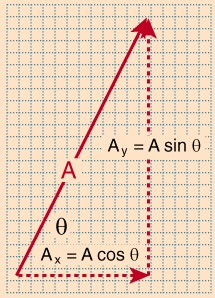

In [1]:
from IPython.display import Image
Image("/home/daniel/git/Python2.7/DataScience/nlp_training_data/vector_comp.jpg")
# http://hyperphysics.phy-astr.gsu.edu/hbase/vect.html

"A" is the magnitude, and the $A_x$ and $A_y$ are the components.

$A_x$ means, the amount of the vector $\vec{A}$, in the $\hat{x}$ direction.

What is a "hat" direction...? That is a unit vector. A unit vector is the direction I mentioned above. Unit vectors form an orthogonal system. The word "unit" means, some amount equal to "1".

You are already familiar with an orthogonal system, the Cartesian Co-ordinate system:

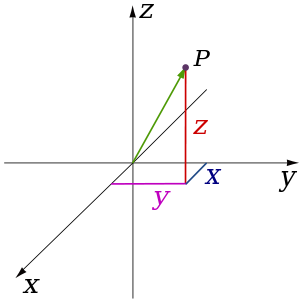

In [29]:
from IPython.display import Image
Image("/home/daniel/git/Python2.7/DataScience/nlp_training_data/cart_example.png")


## Hyper Physics has a good primer
http://hyperphysics.phy-astr.gsu.edu/hbase/vbas.html

# Linearity

A vector space is a linear space. That means, that a vector can be decomposed into it's components and that
a new vector can be formed be adding components. 

## Linear Equations

$y = mx +b$  is a familar linear equation. This another example written in a more careful notation, for a line in 3D space.


In physics, we typically use the notation i,j and k for unit vectors:

# $$ \vec{r} = x\hat{i} + y\hat{j}+ z\hat{k} $$

## It can be generalized to  higher dimensions:

## $$\vec{r} = a_1\hat{x_1} + a_2\hat{x_2} + a_3\hat{x_3} ... a_n\hat{x_n}$$


# In NLP, words are made into vectors with many dimensions. Recall, by definition, a dimension is the rank, or number of unique orthogonal directions which make up the space being described.

## In face, words are chosen as "features" and each "feature" is a unit vector. The amount of a feature is the magnitude times the direction. 



# Bad News About NLP

### We need numeric values to form vectors that our math and computers work on. We need to choose words from a corpus, to become features. These features are converted into a number by counting their frequency of occurance.  Yeah, it's that simple...

Features can be words (1-grams) or n-gram, such as 3 words:

* larry
* larry walked
* larry walked work

If we decide that those three n-grams are featues, then they are also orthogonal to each other by definition, even though some words are repeated. 

# Some  NLP terminology

* Corpus - the entire collection of text under consideration
* document - a container of text if which, the corpus is made, i.e., a tweet from a corpus of tweets.
* tokens - a discrete chunk of characters that we are considering to be a symbol.
* tokenizing -  the act of finding and making a list of tokens from the corpus or a document. This is usually done by use of regular expressions.
* stop words - words not considered at. Becare with these as you can abuse these and cause over fitting.
* TF -  (Number of times term t appears in a document) / (Total number of terms in the document).


# Choosing Features

We will use the Count Vectorizer from Sci-kit Learn. We will also see the TF-IDF vectorizer. The Count vectorizer is pretty much what I wrote about above.

## TF-IDF stands for: term frequency - inverse document frequency.
When figuring out which words of a corpus to use as features, we often don't want to consider words like
"to" or "the". They could be very useful in some cases. In a corpus composed of all the text in a newspaper though,
these high frequency words would not be good choices for freatures. Bad choices for a feature, would be tokens, that occur often across all documents in the corpus.

Those terms are counted, then reduced in weight, by means of an IDF function. A basic one could be:

$$ \frac{count}{n\text{-}occurances} $$

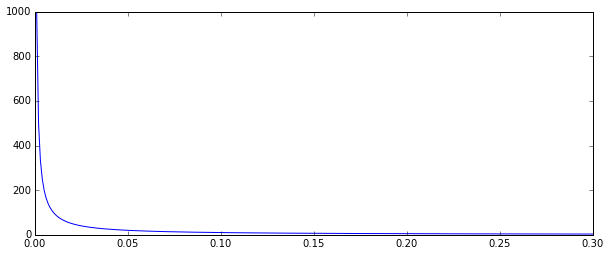

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.001, 1, 1000)
plt.figure(figsize=(10,4))
plt.xlim(0, 0.3)
plt.plot(x, 1/x)

That's kind of abrupt, lets flatten it out by taking the log.

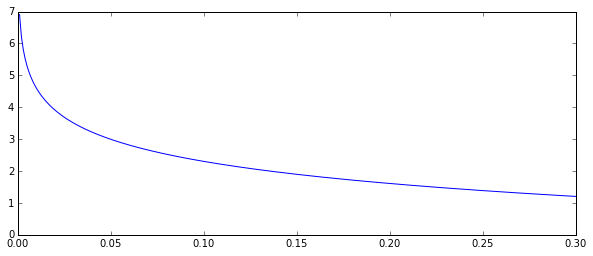

In [8]:
plt.figure(figsize=(10,4))
plt.xlim(0, 0.3)
plt.plot(x, np.log(1/x))

## That's what I tried to do before I learned about IDF...of course there's a better way.

# Term Frequency and IDF

http://www.tfidf.com/

TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

#Counts vs TF ( and IDF)

If I'm vectoring human language into single words, perhaps a newspaper or other long form text, TF is the best bet with use of IDF.

However, a count vectorizer can be useful for very short text like tweets. Or trying to vectorize a computer programming language. The programming language may have a lot of tokens, but they are chosen carefully, and not used so much as connecting phrases between larger ideas. 

If you're worried about tokens like, "return", then consider using n-grams.A collection of n-grams



## Another more interesting way to vectorize in NLP
## We won't cover it in this Meetup... :(
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html#sklearn.feature_extraction.DictVectorizer

When you build a classifier for text, you'll need a dictionary and this method in along those lines.
